In [264]:
clear;
clc;
close all;

In [265]:
load 'ex4data1.mat'
load 'ex4weights.mat'
whos

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        Theta1     25x401                    80200  double
        Theta2     10x26                      2080  double
        X        5000x400                 16000000  double
        y        5000x1                      40000  double

Total is 2015285 elements using 16122280 bytes



### 模型

NN, 一共有 3 层。 第一层 20 * 20 = 400 个单元(不包含 "bias" 1), 第二层 25 个单元（不包含 "bias" 1）


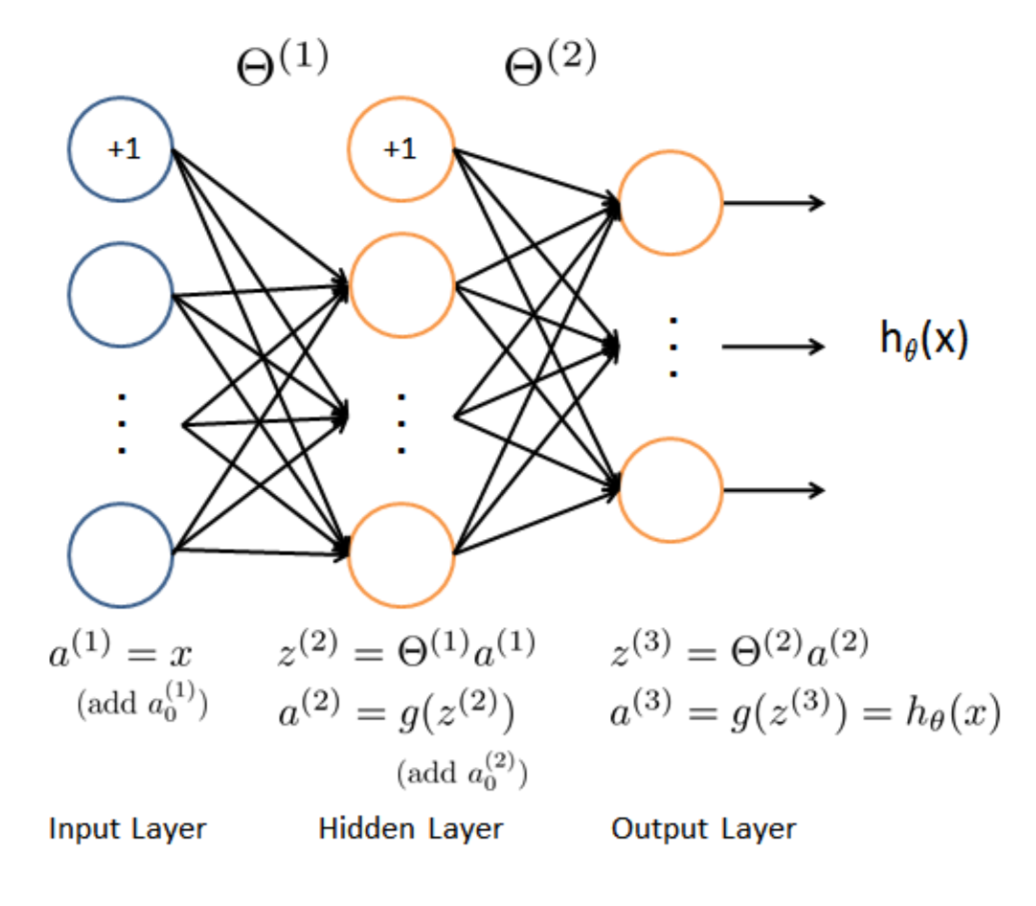

### 手动计算一遍 cost function

第一种计算方法

In [307]:
[m n] = size(X);
A1 = [ones(m, 1) X]; 
size(A1);
Z2 = (Theta1 * A1');
size(Z2);
A2 = [ones(1, m); sigmoid(Z2)];
size(A2);
Z3 = Theta2 * A2;
h = A3 = sigmoid(Z3);
size(h);

yMat = zeros(10, m);
for i = 1:10
    yMat(i, :) = (y == i)';
end
size(y == 1);
size((y == 1)');
size(yMat);
size(yMat(1, :));

format long
-(1/m) * sum(sum(yMat .* log(h) + (1 - yMat) .* log(1 - h)))

ans =  0.287629165161319


In [308]:
[m n] = size(X);
a1 = [ones(m, 1), X]; % a1 = x (add a1(1) = 1), size(a1) = 5000 * 401, size(Theta1) = 25 * 401 
size(a1);
z2 = a1 * Theta1'; % siz3(z2) = 5000 * 25
size(z2);
a2 = [ones(m, 1), sigmoid(z2)]; % a2 = g(z2) (add a2(1) = 1), size(a2) = 5000 * 26 
size(a2);
z3 = a2 * Theta2';
size(z3);
a3 = sigmoid(z3); % a3 = g(z3) = h(x), size(a3) = 5000 * 10, 我们有 10 个分类，每个样本都有 10 个预测结果。
size(a3) 

yMat = zeros(size(y), 10);
for i = 1:10
    yMat(:, i) = (y == i);
end
size(yMat);
format long
-(1/m) * sum(sum(yMat .* log(a3) + (1 - yMat) .* log(1 - a3)))

ans =

   5000     10

ans =  0.287629165161319


第二种计算方法

In [310]:
Delta2 = zeros(size(Theta2));
Delta1 = zeros(size(Theta1));
a1 = [1, X(1, :)]';
size(a1);
z2 = Theta1 * a1;
a2 = [1; sigmoid(z2)];
size(a2);
z3 = Theta2 * a2;
h = a3 = sigmoid(z3);

delta3 = a3 - y(1);
delta2 = Theta2(:, 2:end)' * delta3 .* sigmoidGradient(z2);
size(delta3);
size(delta2);
size(z2);


size(Delta2);
size(Delta1);

size(Delta2(1, 2:end));
Delta2(:, 2:end) = Delta2(:, 2:end) + (delta3 * a2')(:, 2:end);
size(Delta2(:, 2:end));

In [212]:
% compute g'
function g = sigmoidGradient(z)
    gz = sigmoid(z);
    g = gz .* (1.0 - gz);
end


In [319]:
function [J grad] = nnCostFunction(nn_params, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, ...
                                   X, y, lambda)

% Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
% for our 2 layer neural network
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));

% Setup some useful variables
m = size(X, 1);
         
% You need to return the following variables correctly 
J = 0;
Theta1_grad = zeros(size(Theta1));
Theta2_grad = zeros(size(Theta2));

% ====================== YOUR CODE HERE ======================
% Instructions: You should complete the code by working through the
%               following parts.
%
A1 = [ones(m, 1) X]; 
Z2 = (Theta1 * A1');
A2 = [ones(1, m); sigmoid(Z2)];
Z3 = Theta2 * A2;
h = A3 = sigmoid(Z3);
yMat = zeros(num_labels, m);
for i = 1:num_labels
    yMat(i, :) = (y == i)';
end
J = -(1/m) * sum(sum(yMat .* log(h) + (1 - yMat) .* log(1 - h)));

if lambda != 0 
    theta1WithoutBias = Theta1(:, 2:end);
    theta2WithoutBias = Theta2(:, 2:end);

    regTermSum = sum(sum(theta1WithoutBias .^ 2));
    regTermSum += sum(sum(theta2WithoutBias .^ 2));
    J += lambda * regTermSum / ( 2 * m);
end

% %step one: Initialize Deltas
Delta2 = zeros(size(Theta2));
Delta1 = zeros(size(Theta1));

for i = 1 : m
    a1 = [1, X(i, :)]';
    z2 = Theta1 * a1;
    a2 = [1; sigmoid(z2)];
    z3 =  Theta2 * a2;
    h = a3 = sigmoid(z3);

    delta3 = a3 - yMat(:, i);
    delta2 =  (Theta2' * delta3)(2:end) .* sigmoidGradient(z2);
    
    Delta2 = Delta2 + (delta3 * a2');
    Delta1 = Delta1 + (delta2 * a1');
end

Theta2_grad = (1 / m) * Delta2;
Theta1_grad = (1 / m) * Delta1;

if lambda != 0
    Theta2_grad(:, 2:end) += (lambda / m) * Theta2(:, 2:end);
    Theta1_grad(:, 2:end) += (lambda / m) * Theta1(:, 2:end);
end

grad = [Theta1_grad(:) ; Theta2_grad(:)];

end

In [320]:
checkNNGradients

  -9.27825234864343e-03  -9.27825235798856e-03
   8.89911958790179e-03   8.89911959566955e-03
  -8.36010761062767e-03  -8.36010761746488e-03
   7.62813550547747e-03   7.62813551082970e-03
  -6.74798369404428e-03  -6.74798370031873e-03
  -3.04978930998345e-06  -3.04978913519697e-06
   1.42869449604177e-05   1.42869442534126e-05
  -2.59383092782173e-05  -2.59383100023537e-05
   3.69883212947286e-05   3.69883234431411e-05
  -4.68759764338245e-05  -4.68759768851705e-05
  -1.75060081986089e-04  -1.75060082340578e-04
   2.33146357775382e-04   2.33146356524616e-04
  -2.87468728821239e-04  -2.87468729345120e-04
   3.35320349265089e-04   3.35320347216194e-04
  -3.76215585351503e-04  -3.76215586743409e-04
  -9.62660617886968e-05  -9.62660619530046e-05
   1.17982665859273e-04   1.17982665795710e-04
  -1.37149709367179e-04  -1.37149706034393e-04
   1.53247079470731e-04   1.53247081600126e-04
  -1.66560294445617e-04  -1.66560294196760e-04
   3.14544970043684e-01   3.14544970053852e-01
   1.11056588

In [321]:
checkNNGradients(1)

  -0.00927825234864343  -0.00927825235798856
   0.00889911958790179   0.00889911959566955
  -0.00836010761062767  -0.00836010761746488
   0.00762813550547747   0.00762813551082970
  -0.00674798369404428  -0.00674798370031873
  -0.00559135975297664  -0.00559135975311372
   0.01315401892076906   0.01315401891862920
   0.01976122662172841   0.01976122662246528
   0.00827935802583113   0.00827935802827827
  -0.01092729819518468  -0.01092729819467257
  -0.02017486421257431  -0.02017486421335465
  -0.01049831200194973  -0.01049831200348408
   0.00811587200777453   0.00811587200718770
   0.02014746746104024   0.02014746746111360
   0.01262954121727944   0.01262954121639893
  -0.00585433239441713  -0.00585433239525431
  -0.01910996717313651  -0.01910996717179543
  -0.01515689464381964  -0.01515689464146792
   0.00315079127233275   0.00315079127485917
   0.01809234472016641   0.01809234472035580
   0.31454497004368420   0.31454497005385224
   0.11105658820786957   0.11105658821714429
   0.09740